In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

4431872/4422102 [==============================] - 0s 0us/step


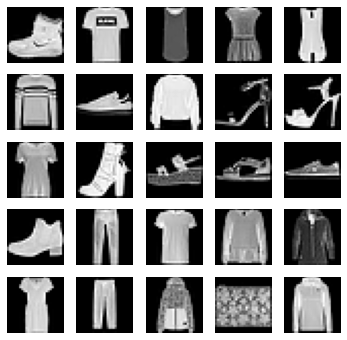

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4764 - accuracy: 0.8299
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3588 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3250 - accuracy: 0.8802
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2981 - accuracy: 0.8906
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8738
테스트 정확도: 0.8737999796867371


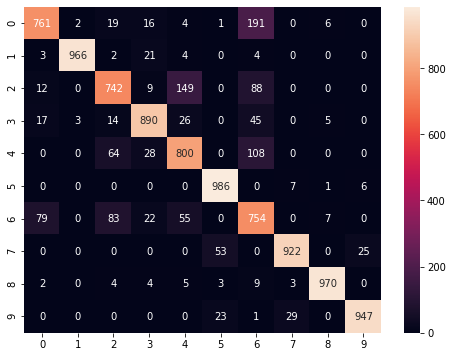

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))

p = model.predict(x_test)
c = confusion_matrix(y_test, np.argmax(p, axis=1))

sns.heatmap(c, annot=True, fmt='d')
plt.show()

In [ ]:
print(c)
print('\n')

for i in range(10):
  print(('%d\t (%d/%d)\taccuracy = %.3f') % (i, np.max(c[i]), np.sum(c[i]), np.max(c[i])/np.sum(c[i])))

[[761   2  19  16   4   1 191   0   6   0]
 [  3 966   2  21   4   0   4   0   0   0]
 [ 12   0 742   9 149   0  88   0   0   0]
 [ 17   3  14 890  26   0  45   0   5   0]
 [  0   0  64  28 800   0 108   0   0   0]
 [  0   0   0   0   0 986   0   7   1   6]
 [ 79   0  83  22  55   0 754   0   7   0]
 [  0   0   0   0   0  53   0 922   0  25]
 [  2   0   4   4   5   3   9   3 970   0]
 [  0   0   0   0   0  23   1  29   0 947]]


0	 (761/1000)	accuracy = 0.761
1	 (966/1000)	accuracy = 0.966
2	 (742/1000)	accuracy = 0.742
3	 (890/1000)	accuracy = 0.890
4	 (800/1000)	accuracy = 0.800
5	 (986/1000)	accuracy = 0.986
6	 (754/1000)	accuracy = 0.754
7	 (922/1000)	accuracy = 0.922
8	 (970/1000)	accuracy = 0.970
9	 (947/1000)	accuracy = 0.947
